In [1]:
from rdkit.Chem.Draw import IPythonConsole
import MDAnalysis as mda, prolif as plf

/workspace/.abc123/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/workspace/.abc123/lib/python3.12/site-packages/MDAnalysis/topology/tables.py:52: DeprecationWarning: Deprecated in version 2.8.0
MDAnalysis.topology.tables has been moved to MDAnalysis.guesser.tables. This import point will be removed in MDAnalysis version 3.0.0
  warnings.warn(wmsg, category=DeprecationWarning)


In [2]:
print(plf.__version__)

2.0.3


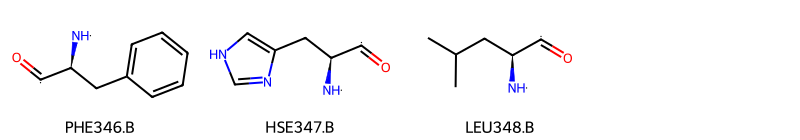

In [3]:
protein_file = str(plf.datafiles.datapath / "vina" / "rec.pdb")
u = mda.Universe(protein_file)
u.atoms.guess_bonds(vdwradii={"H": 1.05, "O": 1.48})
protein_mol = plf.Molecule.from_mda(u)
protein_mol.n_residues

plf.display_residues(protein_mol, slice(260, 263))

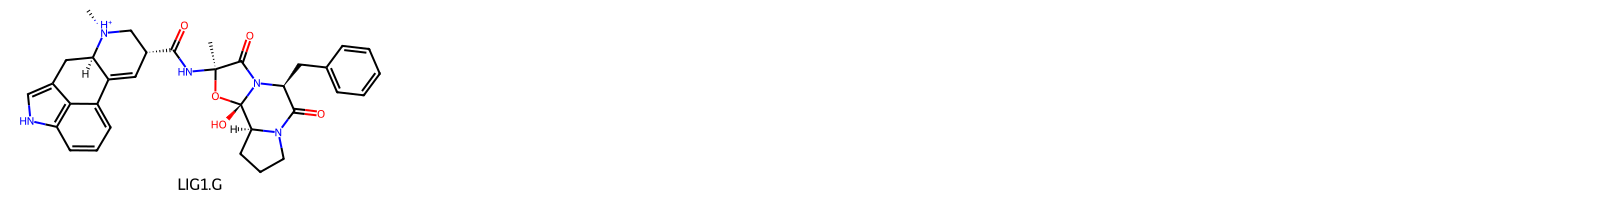

In [4]:
# load PDB with explicit hydrogens
ligand_file = str(plf.datafiles.datapath / "vina" / "lig.pdb")
u = mda.Universe(ligand_file)
ligand_mol = plf.Molecule.from_mda(u)
# display ligand
plf.display_residues(ligand_mol, size=(400, 200))

In [5]:
# use default interactions
fp = plf.Fingerprint()
# run on your poses
FP = fp.generate(ligand_mol, protein_mol, metadata=True) 
print(len(FP))
#FP

18


* indices: atom 44 of 1-st ligand donates H-Bond to atom 10 of the SER212 residue of the protein
* parent_indices: the receptor atom is atom 2819 in the protein.

In [6]:
FP[(plf.residue.ResidueId.from_string("LIG1.G"), 
    plf.residue.ResidueId.from_string("SER212.A"))]

{'HBDonor': ({'indices': {'ligand': (1, 44), 'protein': (10,)},
   'parent_indices': {'ligand': (1, 44), 'protein': (2819,)},
   'distance': 3.4745500774159184,
   'DHA_angle': 152.15696925278826},),
 'VdWContact': ({'indices': {'ligand': (44,), 'protein': (10,)},
   'parent_indices': {'ligand': (44,), 'protein': (2819,)},
   'distance': 2.5485091858493103},)}